In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 4. Hydrogen Atom: Linear Regression

#### Gradient Descent

We want to use gradient descent to compute the optimized coefficients for our guess of the wavefunction:

$$
u(r) = r \theta_0 e^{-(r-\theta_1)/\theta_2}
$$

Here we have a cost function:

$$
J(\theta_0, \theta_1, \theta_2)
$$

and we for each iteration of gradient descent we update $\theta_l$:

$$
\begin{align}
\theta_0^{(k+1)} &= \theta_0^{(k)} - \alpha \dfrac{\partial J}{\partial \theta_0} \\
\theta_1^{(k+1)} &= \theta_1^{(k)} - \alpha \dfrac{\partial J}{\partial \theta_1} \\
\theta_2^{(k+1)} &= \theta_2^{(k)} - \alpha \dfrac{\partial J}{\partial \theta_2} \\
\end{align}
$$

We use gradient descend method to minimise the error between the polynomial approximation of the radial wavefunction and the wavefunction itself.

We are trying to minimise the cost function defined as 

$$ J(\theta) = \dfrac{1}{2m}  \sum_{i=0}^{m} [h(\theta,r_i)-f(r_i) ]^2 $$

where, $h_i(\theta,r_i)$ is the polynomial approximation of a function $f(r)$ which is the actual function of $r$.

$$ h_i(\theta) = {\theta}_{0}+{\theta}_{1}r_i^1+{\theta}_{2}r_i^2+{\theta}_{3}r_i^3 ...+{\theta}_{N}r_i^N $$
    
The update to coefficients ${\theta}_{k}$ is given as:

$$ {\theta}_{k}^{(j+1)} = {\theta}_{k}^{(j)} - \alpha \dfrac{\partial J}{\partial {\theta}_{k}^{(j)}}$$

$$ \frac{\partial J}{\partial {\theta}_{k}} = \dfrac{1}{m}  \sum_{i=0}^{m} [h_i(\theta_k, r_i)-f(r_i)] \dfrac{\partial [h(\theta_k, r_i)-f(r_i)]}{\partial {\theta_k}} $$
$$ = \dfrac{1}{m}  \sum_{i=0}^{m} [h_i(\theta_k, r_i)-f(r_i)]r^k $$
$$ 0 \leq k \leq N $$

where m is the number of data points.

In [27]:
import linear_regression_hydrogen as lrh
import hydrogen_gradient_descent as hygrad

In [42]:
params = {'legend.fontsize': 18,
          'axes.labelsize': 18,
          'axes.titlesize': 18,
          'figure.titlesize': 20,
          'xtick.labelsize' :10,
          'ytick.labelsize': 10,
          'mathtext.fontset': 'custom',
          'mathtext.rm': 'Bitstream Vera Sans',
          'mathtext.it':'Bitstream Vera Sans:italic',
          'grid.color': 'k',
          'grid.linestyle': ':',
          'grid.linewidth': 0.5
         }
plt.rcParams.update(params)

Cost = 0.9300041584447396


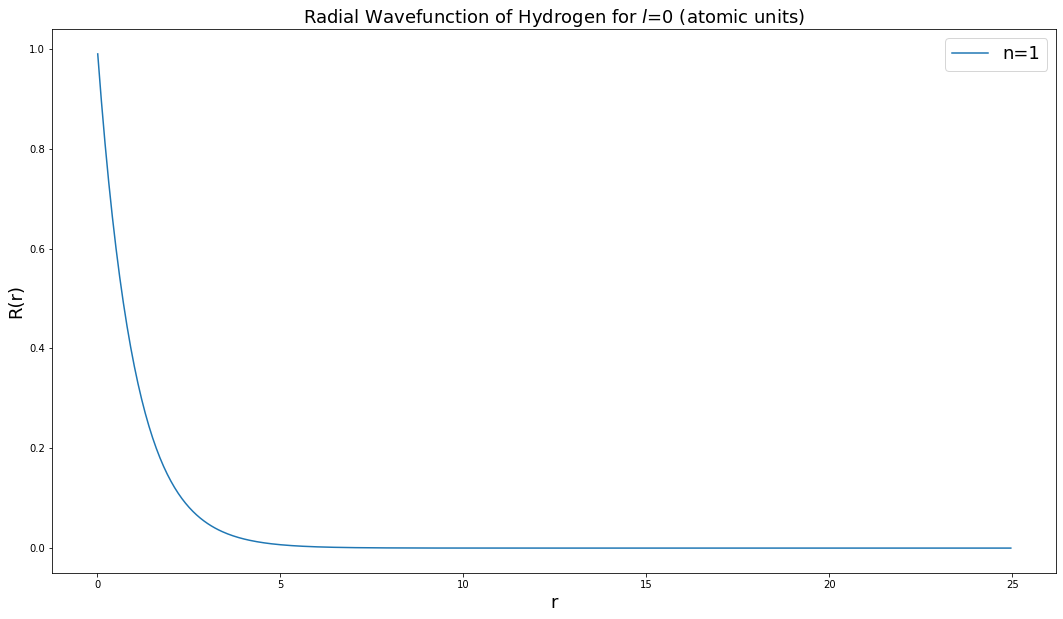

In [43]:
polynomial_degree = 100
r_data = np.arange(0.01, 25, 0.05)
num_data_points = len(r_data)
n = 1
l = 0
hydrogen = hygrad.Hydrogen(azimuthal_number=l, principal_number=n)
R_matrix = lrh.create_R_matrix(num_data_points, polynomial_degree, r_data)
T_matrix = lrh.create_T_matrix(num_data_points, polynomial_degree, r_data)
coefficients = np.zeros(polynomial_degree)
for i in range(1, polynomial_degree):
    coefficients[i] = (-1)**(i-1)*(1/math.factorial(i-1))
u_pred = lrh.get_R_vector(r_data, coefficients)
alpha = 10**-280
max_iterations = 500
max_cost = 10
coefficients, cost = hygrad.gradient_descent(coefficients, alpha, max_cost, max_iterations, r_data, hydrogen, lrh.get_R_vector,
                                             lrh.get_T_vector, lrh.cost_function_deriv, u_pred, R_matrix, T_matrix)
print(f"Cost = {cost}")

fig = plt.figure(figsize=(18,10))
plt.plot(r_data, u_pred/r_data, label=f"n={n}")
plt.xlabel("r")
plt.ylabel("R(r)")
plt.title(f"Radial Wavefunction of Hydrogen for $l$={l} (atomic units)")
plt.legend()
plt.show()